### Data Acces

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
%matplotlib inline

In [ ]:
#data = pd.read_csv('my_file.csv', sep=';', encoding='latin-1', nrows=1000, skiprows=[2,5])

In [4]:
data = pd.read_csv('http://bit.ly/PGGM_dataset')

In [6]:
len(data)

38304

In [11]:
len(data.Identifier.unique())

781

In [21]:
len(data.Name.unique())

814

In [22]:
len(data.Ticker.unique())

781

It seems that Identifier and are the unique identifiers Ticker

In [16]:
#Y2573F10

In [17]:
#data.groupby('Identifier').count().sort_values(by='Name', ascending= False)

In [38]:
table = data.groupby(['Identifier','Name']).count().reset_index()[['Name','Identifier']]

In [43]:
table.groupby('Identifier').count().sort_values(by='Name', ascending= False).head()

,Name
Identifier,
24906P10,2
03349M10,2
28035Q10,2
50075410,2
02079K10,2


In [49]:
data[data.Identifier == '28035Q10'].Name.unique()

array(['Energizer Holdings, Inc.', 'Edgewell Personal Care Co.'],
      dtype=object)

#### Investigate why this happened

In [50]:
data[data.Identifier == '28035Q10']

,Identifier,Name,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Sector,GICS_Ind_Grp,Market_Cap_USD,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth
623,28035Q10,"Energizer Holdings, Inc.",12/31/2014,20141231,EPC-US,-0.038892,-0.583386,6.806850,0.000411,Consumer Staples,Household & Personal Products,7940.2515,128.56,0.057188,5.219074,0.315735,0.044104,1.210838
1256,28035Q10,Edgewell Personal Care Co.,9/30/2015,20150930,EPC-US,2.450979,4.803920,-3.615195,0.000283,Consumer Staples,Household & Personal Products,5074.6226,81.60,0.046905,0.422489,0.465605,0.005690,1.210838
1875,28035Q10,Edgewell Personal Care Co.,8/31/2016,20160831,EPC-US,-0.887388,-3.937012,1.149857,0.000240,Consumer Staples,Household & Personal Products,4749.1510,80.01,0.045933,-1.146445,0.397503,-0.018301,-13.190861
2489,28035Q10,Edgewell Personal Care Co.,11/30/2016,20161130,EPC-US,-3.083146,-7.404602,3.247404,0.000236,Consumer Staples,Household & Personal Products,4697.6340,79.14,0.049405,3.660685,0.399053,0.037727,-13.190861
3113,28035Q10,Edgewell Personal Care Co.,5/31/2017,20170531,EPC-US,2.871203,5.701387,2.406347,0.000195,Consumer Staples,Household & Personal Products,4235.6543,73.14,0.054576,3.968354,0.440379,0.043888,-12.191879


#### What is the range of the continous variables?

- Check out the date

In [74]:
tuples = []
for column in data.columns:
    tuples.append((column, data[str(column)].map(type).unique()))

In [75]:
pd.DataFrame(tuples)

,0,1
0,Identifier,[<class 'str'>]
1,Name,[<class 'str'>]
2,Period,[<class 'str'>]
3,Period_YYYYMMDD,[<class 'int'>]
4,Ticker,[<class 'str'>]
5,Universe_Returns_F1W,[<class 'float'>]
6,Universe_Returns_F4W,[<class 'float'>]
7,Universe_Returns_F12W,[<class 'float'>]
8,Weight,[<class 'float'>]
9,GICS_Sector,[<class 'str'>]


In [81]:
#[len(str(i)) for i in data.Period_YYYYMMDD]

In [85]:
data.Period_YYYYMMDD.map(str).map(len).unique()

array([8])

In [89]:
#pd.Timestamp()

In [97]:
#converted = []
#for row in data.Period_YYYYMMDD.map(str):
#        converted.append(pd.Timestamp(year=int(row[0:4]), month=int(row[4:6]), day=int(row[6:8])))

In [98]:
data.Period = [pd.to_datetime(i, format='%Y%m%d') for i in data.Period_YYYYMMDD]

In [189]:
data['month'] = [date.month for date in data.Period]

In [191]:
data['day'] = [date.day for date in data.Period]

In [192]:
data['year'] = [date.year for date in data.Period]

In [161]:
data.Period.describe()

count                   38304
unique                     61
top       2015-09-30 00:00:00
freq                      637
first     2014-12-31 00:00:00
last      2018-12-26 00:00:00
Name: Period, dtype: object

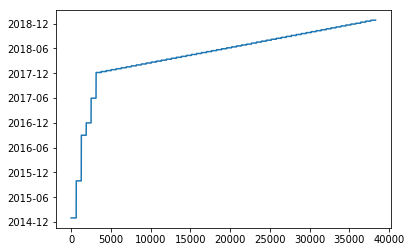

In [162]:
data.Period.plot()

In [195]:
year_distr =data.groupby('year').count()['Identifier'].reset_index().sort_values('year')

In [201]:
year_distr['relative'] = year_distr.Identifier / year_distr.Identifier.sum() *100

In [202]:
year_distr

,year,Identifier,relative
0,2014,631,1.647348
1,2015,637,1.663012
2,2016,1236,3.226817
3,2017,3156,8.239348
4,2018,32644,85.223475


In [302]:
year_distr.to_csv('test.csv')

In [181]:
#plt.figure(figsize=(20,10))
#plt.plot(period.Period, period.Identifier)

In [281]:
df_assets = data[(data.year == 2018 ) | (data.year == 2017)].reset_index()

In [282]:
df_assets = df_assets.iloc[:,~df_assets.columns.isin(['index','Period_YYYYMMDD','month','day','year'])]

In [275]:
df_assets.head()

,Identifier,Name,Period,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Sector,GICS_Ind_Grp,Market_Cap_USD,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth,month,day,year
0,17290810,Cintas Corporation,2017-05-31,CTAS-US,-1.104224,0.699079,6.490314,0.000487,Industrials,Commercial & Professional Services,10567.439,125.88,0.039019,11.504222,0.166046,0.037012,5.222880,5,31,2017
1,80589M10,SCANA Corporation,2017-05-31,SCG-US,0.718486,0.621235,-11.214828,0.000427,Utilities,Utilities,9259.593,68.20,0.063528,3.288115,0.595745,0.060431,-1.332848,5,31,2017
2,50241310,L3 Technologies Inc,2017-05-31,LLL-US,-3.452158,-0.326234,6.780422,0.000601,Industrials,Capital Goods,13033.503,168.59,0.053755,5.374870,0.360253,0.048646,-6.111873,5,31,2017
3,91301710,United Technologies Corporation,2017-05-31,UTX-US,-1.236808,1.005936,-2.931857,0.004372,Industrials,Capital Goods,94869.510,121.28,0.055867,5.893464,0.283968,0.052882,-0.664265,5,31,2017
4,92939U10,WEC Energy Group Inc,2017-05-31,WEC-US,0.987899,-0.908220,4.482388,0.000913,Utilities,Utilities,19808.143,62.76,0.050564,3.215767,0.460755,0.047482,14.555154,5,31,2017


---

In [102]:
sector = data.GICS_Sector.unique()

In [103]:
print(len(sector), sector)

11 ['Industrials' 'Utilities' 'Information Technology' 'Health Care'
 'Financials' 'Consumer Staples' 'Consumer Discretionary' 'Materials'
 'Energy' 'Communication Services' 'Real Estate']


#### let's find out the distribution

In [108]:
df_sector = data.groupby('GICS_Sector').count()['Identifier'].reset_index()

In [114]:
df_sector['relative'] = round(df_sector.Identifier / df_sector.Identifier.sum() *100,2)

In [115]:
df_sector

,GICS_Sector,Identifier,relative
0,Communication Services,505,1.32
1,Consumer Discretionary,6043,15.78
2,Consumer Staples,2197,5.74
3,Energy,2357,6.15
4,Financials,5544,14.47
5,Health Care,4200,10.96
6,Industrials,5248,13.70
7,Information Technology,6117,15.97
8,Materials,1871,4.88
9,Real Estate,2264,5.91


<BarContainer object of 11 artists>

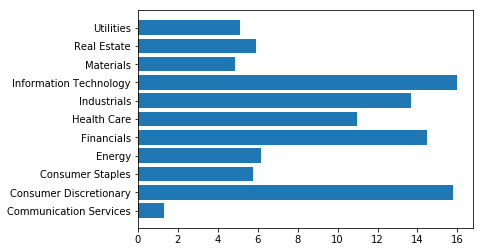

In [117]:
plt.barh(df_sector.GICS_Sector, df_sector.relative)

#### Now with the other category

In [142]:
df_ind_grp = data.groupby('GICS_Ind_Grp').count()['Identifier'].reset_index().sort_values(by='Identifier')

<BarContainer object of 25 artists>

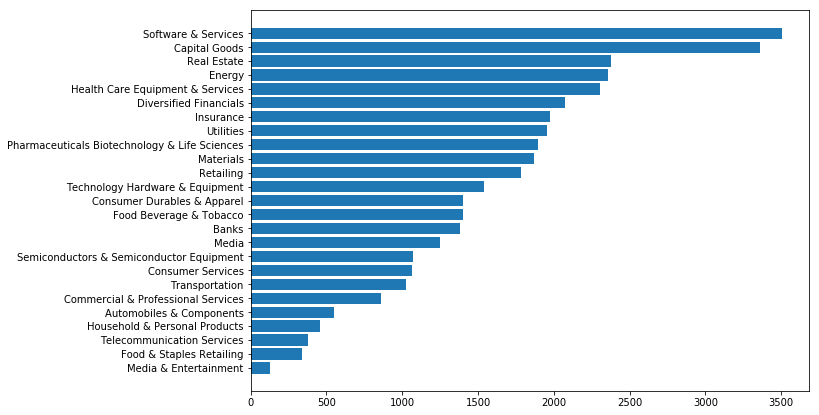

In [146]:
plt.figure(figsize=(10,7))
plt.barh(df_ind_grp.GICS_Ind_Grp,df_ind_grp.Identifier)

In [153]:
#plt.figure(figsize=(16,8))
#squarify.plot(sizes=df_ind_grp.Identifier, label=df_ind_grp.GICS_Ind_Grp, alpha=.8 )

#### Now we go with the continous variables

In [263]:
df_assets.Price_USD.mean()

113.25087812368751

In [265]:
df_assets.Price_USD.std()

182.55937864111445

In [272]:
df_assets._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
Universe_Returns_F1W,35796.0,-0.066080,3.920771,-47.561474,-1.896907,0.213820,2.068147,4.686403e+01
Universe_Returns_F4W,35792.0,-0.154914,7.510207,-67.705421,-4.405210,0.245970,4.307598,6.350252e+01
Universe_Returns_F12W,35764.0,-0.884122,11.913881,-68.235580,-7.907254,-0.706375,6.261155,1.146000e+02
Weight,35800.0,0.001592,0.003071,0.000069,0.000401,0.000648,0.001453,4.499400e-02
Market_Cap_USD,35800.0,38810.098887,75002.591339,1536.665400,9779.084500,15830.107500,35477.188750,1.140656e+06
Price_USD,35800.0,113.250878,182.559379,3.410000,45.700000,74.890000,125.982500,3.646690e+03
NTM_EP,35745.0,0.060391,0.031731,-0.198387,0.042056,0.057127,0.076860,2.918300e-01
LTM_ROA,35757.0,5.877302,7.200247,-70.063467,1.714856,4.924519,9.032338,6.473507e+01
BP,35790.0,0.363210,0.306704,-0.341276,0.149641,0.291583,0.503166,3.374985e+00
LTM_EP,35733.0,0.039619,0.052291,-0.760417,0.020035,0.039754,0.059893,3.543030e-01


Let's take the market capital and plot it over the time

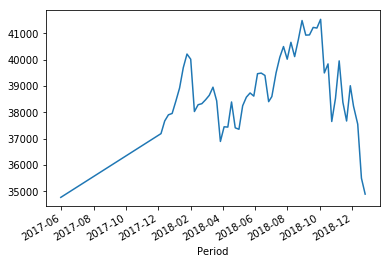

In [296]:
df_assets.groupby('Period').mean()['Market_Cap_USD'].plot()

In [295]:
#df_assets.groupby('Period').mean()['5Y_Sales_Growth'].plot()

In [298]:
market_label = []
for i in df_assets.Market_Cap_USD:
    if i > 38000:
        market_label.append('>38')
    else:
        market_label.append('<38')

In [300]:
df_assets['market_label'] = market_label